## Exploratory Data Analysis
In this area, we will focus on analysis and visualizations to extract insights from our dataset.

In [86]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the cleaned CSV data set
df = pd.read_csv('/Users/user/Desktop/Analytics/Ecommerce/cleaned_ecommerce_data.csv', encoding = 'ISO-8859-1',parse_dates=['InvoiceDate'])
df.dtypes

InvoiceNo                  object
StockCode                  object
Description                object
Quantity                    int64
InvoiceDate        datetime64[ns]
UnitPrice                 float64
CustomerID                 object
Country                    object
TotalPrice                float64
InvoiceMonth                int64
InvoiceYear                 int64
TransactionType            object
dtype: object

## 1. Sales Analysis

### Total Sales by Product ###

We calculate and visualize the top-selling products:
- The products with the top most sales are:  ***Dotcom Postage*, *Regency Cakestand 3 Tier*, *Paper Craft , Little Birdie***


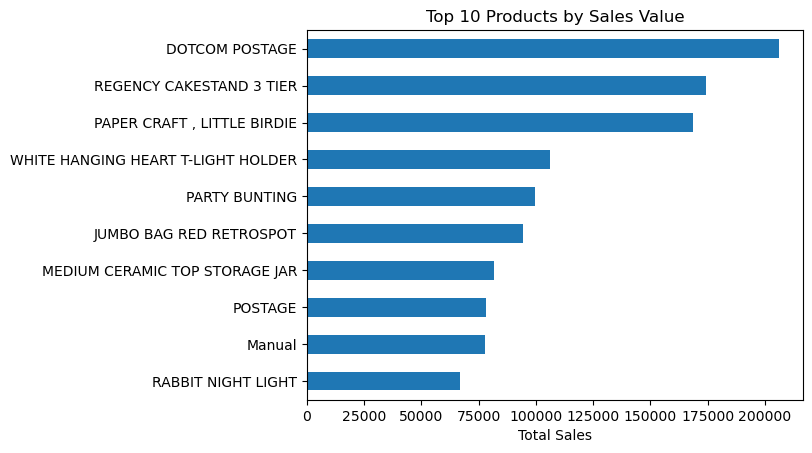

In [87]:
# Aggregating sales by product to find top sellers
top_products = df[df['TransactionType'] == 'Sale'].groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Plotting a bar graph for top products
top_products.sort_values(ascending=True).plot(kind='barh', y = 'Description', title='Top 10 Products by Sales Value',ylabel='',xlabel='Total Sales')
plt.show()

### Sales Over Time ###

We aggregate sales by month and plot the trend:
- Sales appear to be increasing during all the months with the **highest peak in November**.

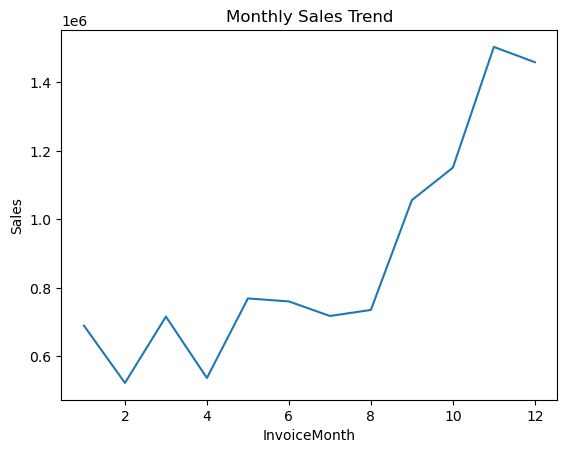

In [95]:
# monthly sales
monthly_sales = df[df['TransactionType'] == 'Sale'].groupby('InvoiceMonth')['TotalPrice'].sum()

# Monthly sales plot
monthly_sales.plot(title='Monthly Sales Trend', kind='line',ylabel='Sales')
plt.show()

## 2. Customer Behavior ##

### Top Customers by Spend ###
We analyze the total spend by CustomerID to determine the top 10 buyers. 

The top 3 CustomerIDs by spend are **14646, 18102, 17450**

In [89]:
# Identifying top 10 buyers 
top_customers = df[(df['TransactionType'] == 'Sale') & (df['CustomerID'] != 'Unknown')].groupby('CustomerID')['TotalPrice'].sum()
top_customers = top_customers.sort_values(ascending=False).head(10)

print(f'The top 10 customers by spend are:\n{top_customers}')

The top 10 customers by spend are:
CustomerID
14646    280206.02
18102    259657.30
17450    194390.79
16446    168472.50
14911    143711.17
12415    124914.53
14156    117210.08
17511     91062.38
16029     80850.84
12346     77183.60
Name: TotalPrice, dtype: float64


### Purchase Frequency 
We analyze how frequently customers are making purchases.

The top 3 customers to have made the most purchases have CustomerIDs: **14911, 12748, 17841**.

In [90]:
# Calculating how frequent customers make purchases
purchase_freq = df[(df['CustomerID'] != 'Unknown')].groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)
print(f'The top 10 frequent customer are:\n{purchase_freq}')

The top 10 frequent customer are:
CustomerID
14911    248
12748    224
17841    169
14606    128
13089    118
15311    118
12971     89
14527     86
13408     81
14646     77
Name: InvoiceNo, dtype: int64


## 3. Geographic Analysis 

### Sales Distribution by Country
We group sales by country.

**United Kingdom** has about 90% of the sales with some notable sales in the **Netherlands, EIRE, Germany, France and Australia** while the other countries have relatively low sales volumes.

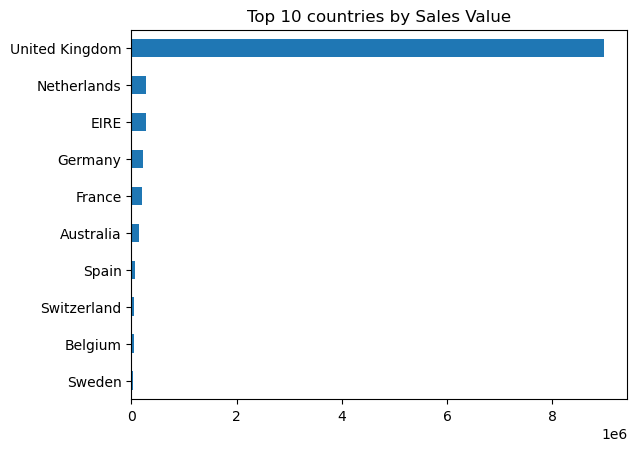

In [91]:
# Calculate total sales by country
country_sales = df[df['TransactionType'] == 'Sale'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Plot sales by country for top countries
country_sales.sort_values(ascending=True).plot(kind='barh',title = 'Top 10 countries by Sales Value', ylabel='')
plt.show()

## 4. Product Returns Analysis

### Total Returns
We identify products with the highest return quantity.

The **Paper Craft , Little Birdie** is the top returned product in quantity despite it being among the top-selling products.

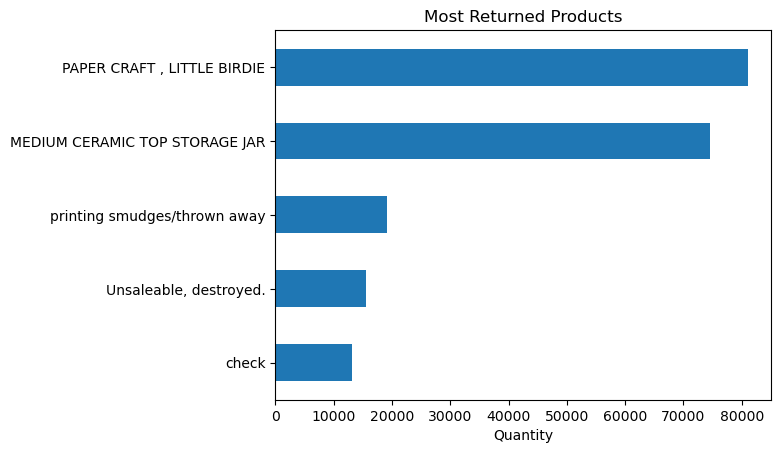

In [101]:
# Filter the returns data
returns = df[df['TransactionType'] == 'Return']

# Calculate the top 5 returned items
top_returned_products = returns.groupby('Description')['Quantity'].sum().abs().sort_values(ascending=False).head(5)

# Plot the top 5 most returned items
top_returned_products.sort_values(ascending=True).plot(kind='barh',title= 'Most Returned Products', ylabel='',xlabel='Quantity')
plt.show()

### Return Rates:

We calculate the return rate for each product (as a percentage of the total quantity sold).

It look like **Samples and Amazon Fee** are the top returned items

In [93]:
# Calculate the total overall sales quantity
total_sales = df[df['TransactionType'] == 'Sale'].groupby('Description')['Quantity'].sum()

# Calculate the returned products
total_returns = returns.groupby('Description')['Quantity'].sum().abs()

# Items with top return rates
return_rate = (total_returns / total_sales).sort_values(ascending=False).head(10)
print(return_rate)

Description
SAMPLES                            30.000000
AMAZON FEE                         16.000000
check                              10.884963
damaged                             9.500000
BLUE PADDED SOFT MOBILE             7.000000
PINK POODLE HANGING DECORATION      2.400000
Bank Charges                        2.083333
PINK CHERRY LIGHTS                  2.000000
WOODEN BOX ADVENT CALENDAR          1.600000
3 WICK CHRISTMAS BRIAR CANDLE       1.333333
Name: Quantity, dtype: float64


## 5. Net Revenue Calculation

### Net Revenue
We calculate the net revenue by subtracting returns from total sales. Since it is a UK-based store we assume currency is Pounds. 

The calculated net_revenue is **9,726,006.95**

In [94]:
# Calculating the total sales
total_sales_value = df[df['TransactionType'] == 'Sale']['TotalPrice'].sum()

# Calculating the total return value
total_return_value = returns['TotalPrice'].abs().sum()

# Net revenue
net_revenue = total_sales_value - total_return_value

print(f'The net revenue for the sales is: {net_revenue.round(2)}')

The net revenue for the sales is: 9726006.95
